In [12]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.formula.api as smf
with open('df.pickle', 'rb') as f:
    df = pickle.load(f)

In [16]:
df

,rank,artist,title,uris,artistID,dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,ts
0,0,Post Malone,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,246dkjvS1zLTtiykXe5h60,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.553,120.042,215280,4
1,1,Post Malone,Take What You Want (feat. Ozzy Osbourne & Trav...,spotify:track:7CZyCXKG6d5ALeq41sLzbw,246dkjvS1zLTtiykXe5h60,0.499,0.800,1,-2.665,0,0.0502,0.090600,0.000000,0.1470,0.272,139.919,229573,4
2,2,DaBaby,BOP,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,4r63FhuTkUYltbVAg5TQnk,0.769,0.787,11,-3.909,1,0.3670,0.189000,0.000000,0.1290,0.836,126.770,159715,4
3,3,Arizona Zervas,ROXANNE,spotify:track:696DnlkuDOXcMAnKlTgXXK,0vRvGUQVUjytro0xpb26bs,0.621,0.601,6,-5.616,0,0.1480,0.052200,0.000000,0.4600,0.457,116.735,163636,5
4,6,Kanye West,Follow God,spotify:track:2QpGZOhTCHHiKmpSO9FW4h,5K4W6rqBFWDnAN6FQUkS6x,0.529,0.900,1,-3.503,1,0.4180,0.000248,0.000012,0.0426,0.434,180.291,104591,4
5,7,NF,Time,spotify:track:6MxMqCgqmekcr0VwSU7AVH,6fOMl44jA4Sp5b9PpYCkzz,0.677,0.688,0,-4.058,0,0.0633,0.138000,0.000000,0.1140,0.198,98.049,240429,4
6,8,Post Malone,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,246dkjvS1zLTtiykXe5h60,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.553,120.042,215280,4
7,10,Wale,On Chill (feat. Jeremih),spotify:track:5z51HY4ei5QhTjcvwq5Msw,67nwj3Y5sZQLl72VNUHEYE,0.597,0.733,1,-6.017,1,0.4100,0.134000,0.000000,0.1590,0.639,171.016,214035,4
8,11,Tyga,Ayy Macarena,spotify:track:6LcauUZjF1eXQrgqMUecHX,5LHRHt1k9lMyONurDHEdrp,0.816,0.630,2,-5.568,1,0.2260,0.133000,0.000000,0.0692,0.715,96.493,131607,4
9,14,Lil Baby,Woah,spotify:track:598yNsG1JFrGd4n2kMoz7F,5f7VJjfbwm532GiveGC0ZK,0.882,0.602,11,-5.554,1,0.2450,0.017700,0.000000,0.1780,0.430,142.959,183011,4


In [22]:
dfx=df[['dance','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration','ts']]

In [23]:
def CorrMtx(df, dropDuplicates = True):

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set(style = 'white')
    sns.set_palette('bright')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    return f

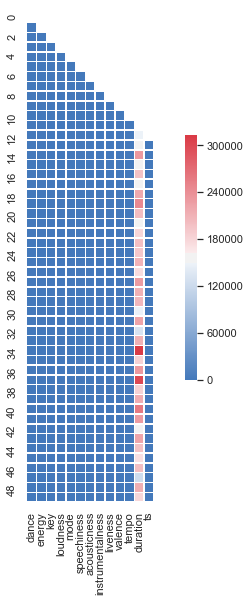

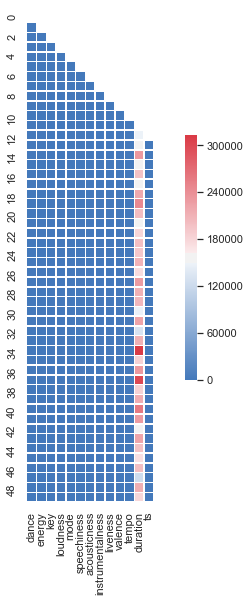

In [24]:
CorrMtx(dfx)

In [3]:
df.drop(columns='rank',inplace=True)
df['rank']=df.index
df

,artist,title,uris,artistID,dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,ts,rank
0,Post Malone,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,246dkjvS1zLTtiykXe5h60,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.553,120.042,215280,4,0
1,Post Malone,Take What You Want (feat. Ozzy Osbourne & Trav...,spotify:track:7CZyCXKG6d5ALeq41sLzbw,246dkjvS1zLTtiykXe5h60,0.499,0.800,1,-2.665,0,0.0502,0.090600,0.000000,0.1470,0.272,139.919,229573,4,1
2,DaBaby,BOP,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,4r63FhuTkUYltbVAg5TQnk,0.769,0.787,11,-3.909,1,0.3670,0.189000,0.000000,0.1290,0.836,126.770,159715,4,2
3,Arizona Zervas,ROXANNE,spotify:track:696DnlkuDOXcMAnKlTgXXK,0vRvGUQVUjytro0xpb26bs,0.621,0.601,6,-5.616,0,0.1480,0.052200,0.000000,0.4600,0.457,116.735,163636,5,3
4,Kanye West,Follow God,spotify:track:2QpGZOhTCHHiKmpSO9FW4h,5K4W6rqBFWDnAN6FQUkS6x,0.529,0.900,1,-3.503,1,0.4180,0.000248,0.000012,0.0426,0.434,180.291,104591,4,4
5,NF,Time,spotify:track:6MxMqCgqmekcr0VwSU7AVH,6fOMl44jA4Sp5b9PpYCkzz,0.677,0.688,0,-4.058,0,0.0633,0.138000,0.000000,0.1140,0.198,98.049,240429,4,5
6,Post Malone,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,246dkjvS1zLTtiykXe5h60,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.553,120.042,215280,4,6
7,Wale,On Chill (feat. Jeremih),spotify:track:5z51HY4ei5QhTjcvwq5Msw,67nwj3Y5sZQLl72VNUHEYE,0.597,0.733,1,-6.017,1,0.4100,0.134000,0.000000,0.1590,0.639,171.016,214035,4,7
8,Tyga,Ayy Macarena,spotify:track:6LcauUZjF1eXQrgqMUecHX,5LHRHt1k9lMyONurDHEdrp,0.816,0.630,2,-5.568,1,0.2260,0.133000,0.000000,0.0692,0.715,96.493,131607,4,8
9,Lil Baby,Woah,spotify:track:598yNsG1JFrGd4n2kMoz7F,5f7VJjfbwm532GiveGC0ZK,0.882,0.602,11,-5.554,1,0.2450,0.017700,0.000000,0.1780,0.430,142.959,183011,4,9


In [5]:
df.columns[5:]

Index(['key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration', 'rank'],
      dtype='object')

In [29]:
f= 'rank~duration+loudness+energy'
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     4.319
Date:                Sat, 07 Dec 2019   Prob (F-statistic):            0.00916
Time:                        12:51:06   Log-Likelihood:                -234.59
No. Observations:                  50   AIC:                             477.2
Df Residuals:                      46   BIC:                             484.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -106.7976     52.633     -2.029      0.048    -212.742      -0.853
duration       0.0002   9.31e-05      2.435      0.019    3.93e-05       0.000
loudness     -10.2975      3.375     -3.051      0.004     -17.092      -3.503
energy        82.1022     44.118      1.861      0.069      -6.703     170.908
==============================================================================
Omnibus:                        0.643   Durbin-Watson:                   0.567
Prob(Omnibus):                  0.725   Jarque-Bera (JB):                0.751
Skew:                           0.157   Prob(JB):                        0.687
Kurtosis:                       2.488   Cond. No.                     3.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# f = 'rank~loudness+instrumentalness+liveness+duration'
# f= 'rank~loudness+instrumentalness+liveness+duration+loudness*instrumentalness'
f= 'rank~liveness+duration+instrumentalness*loudness'
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     5.487
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           0.000373
Time:                        17:45:12   Log-Likelihood:                -243.92
No. Observations:                  60   AIC:                             499.8
Df Residuals:                      54   BIC:                             512.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -15.8307     11.822     -1.339      0.186     -39.532       7.871
liveness                     45.2390     16.033      2.822      0.007      13.095      77.382
duration                      0.0001   3.89e-05      3.156      0.003    4.48e-05       0.000
instrumentalness          -1.132e+04   6492.822     -1.744      0.087   -2.43e+04    1693.954
loudness                     -2.7783      1.370     -2.027      0.048      -5.526      -0.031
instrumentalness:loudness  -844.7052    591.563     -1.428      0.159   -2030.717     341.307
==============================================================================
Omnibus:                        2.495   Durbin-Watson:                   0.697
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.497
Skew:                           0.058   Prob(JB):                        0.473
Kurtosis:                       2.235   Cond. No.                     6.92e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""